In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
df = pd.read_csv("data/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [11]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [14]:
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [16]:
df['Embarked'] = df['Embarked'].fillna('S')

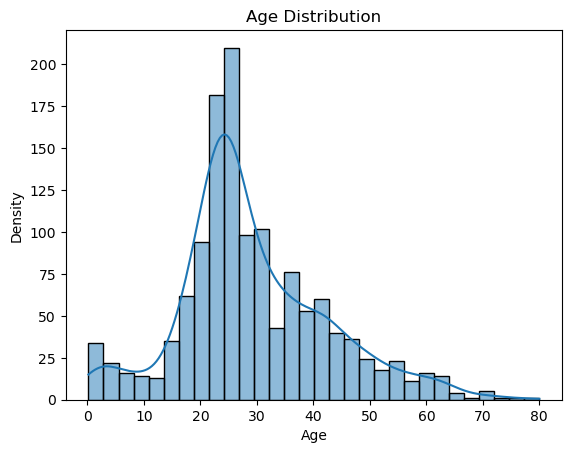

In [18]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [19]:
# mean age
print('Mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('Median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

Mean of "Age" is 29.26
Median of "Age" is 26.00


In [22]:
df["HasCabin"] = ~df.Cabin.isnull()

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [24]:
df.drop('Cabin', axis=1, inplace=True)

In [26]:
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr


In [34]:
df['Title'].value_counts()

Title
Mr        758
Miss      264
Mrs       197
Master     61
Unique     29
Name: count, dtype: int64

In [29]:
df["Title"] = df["Title"].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mr"})

In [33]:
df["Title"] = df["Title"].replace(["Rev", "Dr", "Col", "Major", "Don", "Lady", "Jonkheer", "Dona", "Capt", "Sir", "Countess"], "Unique")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Unique')])

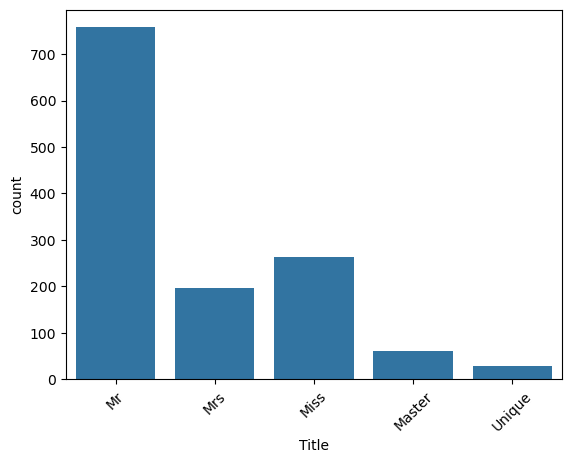

In [35]:
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)

In [36]:
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr,2,1


In [38]:
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False )

In [40]:
df['CatFare'].value_counts()

CatFare
0    337
2    328
3    323
1    321
Name: count, dtype: int64

In [41]:
df = df.drop(["Age", "Fare", "Name", "Ticket"], axis=1)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,male,1,0,S,False,Mr,0,0
1,2,1.0,1,female,1,0,C,True,Mrs,3,3
2,3,1.0,3,female,0,0,S,False,Miss,1,1
3,4,1.0,1,female,1,0,S,True,Mrs,2,3
4,5,0.0,3,male,0,0,S,False,Mr,2,1


In [43]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [44]:
df.to_csv('data/Titanic_Cleaned.csv', index=False)